In [3]:
import pandas as pd
from matplotlib import pyplot as plt

In [6]:
restaurants = pd.read_csv('restaurants.csv')
print(restaurants.head(10))

   id                     name neighborhood     cuisine
0   1               Jongro BBQ      Midtown      Korean
1   2                 Pocha 32      Midtown      Korean
2   3       Nom Wah Tea Parlor    Chinatown     Chinese
3   4                Roberta’s     Brooklyn       Pizza
4   5             Speedy Romeo     Brooklyn       Pizza
5   6             Buddha Bodai    Chinatown  Vegetarian
6   7  Nan Xiang Xiao Long Bao       Queens     Chinese
7   8     Mission Chinese Food     Downtown     Chinese
8   9                  Baohaus     Downtown     Chinese
9  10       al di la Trattoria     Brooklyn     Italian


**Inspecting number of different types of cuisine FoodWheel offers**

In [4]:
cuisine_options_count = restaurants.cuisine.nunique()
print(cuisine_options_count)

7


**the number of restautants of each cuisine.**

In [5]:
cuisine_counts = restaurants.groupby('cuisine').name.count().reset_index()
print(cuisine_counts)

      cuisine  name
0    American    10
1     Chinese    11
2     Italian     8
3    Japanese     4
4      Korean     3
5       Pizza     4
6  Vegetarian     4


In [8]:
cuisines = cuisine_counts.cuisine.values
counts = cuisine_counts.name.values

**Creating a pie chart to explore the percentage of each cuisine**

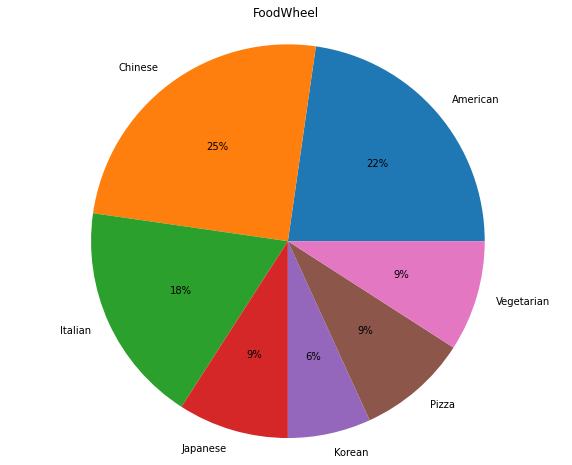

In [10]:
plt.figure(figsize=(10,8))
plt.pie(counts,labels=cuisines, autopct='%d%%')
plt.title('FoodWheel')
plt.axis('equal')
plt.show()

### Orders Over Time

In [4]:
orders = pd.read_csv('orders.csv')
print (orders.head(10))

   id  customer_id       date  price
0   1           61  6-18-2017   13.0
1   2          210   5-8-2017   21.0
2   3            0   9-7-2017   33.0
3   4           66   7-7-2017   19.0
4   5           65  4-26-2017   13.0
5   6           43   6-7-2017   18.0
6   7            8  6-25-2017   19.0
7   8          104   4-8-2017    8.0
8   9          136   9-6-2017   32.0
9  10          116  4-10-2017   15.0


The function split will split a string on a character. For instance, if date is the string 6-18-2017, then date.split('-') would return the list [6, 18, 2017]. date.split('-')[0] would return the zero-indexed element '6'.

In [11]:
orders['month'] = orders.date.apply(lambda x: x.split('-')[0])
print(orders.head())

   id  customer_id       date  price month
0   1           61  6-18-2017   13.0     6
1   2          210   5-8-2017   21.0     5
2   3            0   9-7-2017   33.0     9
3   4           66   7-7-2017   19.0     7
4   5           65  4-26-2017   13.0     4


Management suspects that the average order size has increased over time. They’d like you to investigate if this claim is true.

In [14]:
avg_order = orders.groupby('month').price.mean().reset_index()
print(avg_order)

  month      price
0     4   9.609195
1     5  14.858824
2     6  15.152174
3     7  18.012821
4     8  21.150685
5     9  29.505882


In [15]:
std_order = orders.groupby('month').price.std().reset_index()
print(std_order)

  month     price
0     4  2.562504
1     5  3.395210
2     6  2.835934
3     7  2.848985
4     8  4.455556
5     9  4.518806


**Create a bar chart to share this data with the height of each bar coming from the average orders of each month and bar errors representing the standard deviations grouped by each month.**

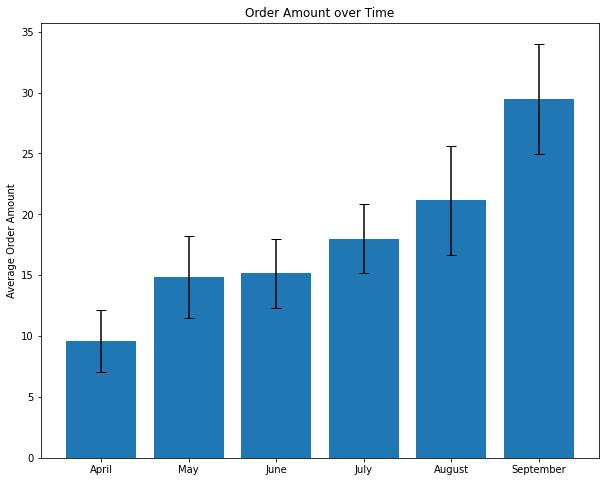

In [16]:
plt.figure(figsize=(10,8))

# since there is only one plot, we could leave the arguement blank
ax = plt.subplot()
bar_heights = avg_order.price
bar_errors = std_order.price
plt.bar(range(len(bar_heights)), bar_heights, yerr=bar_errors, capsize=5)
ax.set_xticks(range(len(bar_heights)))
ax.set_xticklabels(['April', 'May', 'June', 'July', 'August', 'September'])
plt.ylabel('Average Order Amount')
plt.title('Order Amount over Time')
plt.show()

### Customer Types
**Investigating customer types by creating a histogram of the amount spent by each of them over the past six months.**

In [17]:
customer_amount = orders.groupby('customer_id').price.sum().reset_index()
print(customer_amount.head(10))

   customer_id  price
0            0   83.0
1            2   11.0
2            3   65.0
3            4   32.0
4            5  119.0
5            6   29.0
6            7   26.0
7            8   56.0
8            9   64.0
9           11   22.0


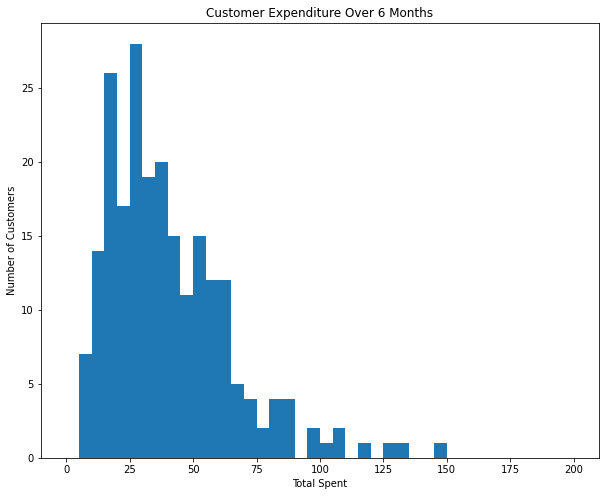

In [18]:
plt.figure(figsize=(10,8))
plt.hist(customer_amount.price.values, range=(0, 200), bins=40)
plt.xlabel('Total Spent')
plt.ylabel("Number of Customers")
plt.title('Customer Expenditure Over 6 Months')
plt.show()